In [1]:
from scipy import stats
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import Image

# PROBABILITY DISTRIBUTIONS  & RANDOM NUMBERS

## Sample mean and variance of given data 

In [2]:
data= [1.7954749844952811, -0.82344065038249903, -0.2192039195121927, 0.43421078851339012, -1.3937260553671886, 0.85161210073274862, -2.6686243950360145, -0.35207951288551514, -0.10940076133160911, -0.59905215298171999, -1.9077435365842492, 0.020406556867819687, -1.2667957796625413, -0.89430991460718678, 1.8038278417226581, 0.22364484431918985, 0.24387840765089427, 0.16074727588740503, -0.60364894979460193, 0.88708395065341128, 0.59160454172753119, 0.69199479160946198, 1.0520703481037412, 0.50795459134774568, 1.5768791411906093, 0.11136128559501068, 0.96834991062732267, -1.0799223246865801, -0.77406582026005244, -0.30040067363629003, 1.2377561077782491, -0.99824929203421076, -0.02168098535073721, -1.0387804686170952, -0.58153332350166953, -0.88398216313031486, 0.98199801462526692, -0.65395591277809428, 1.188250840837731, 0.058226502477458669, 0.96105869074830363, 0.10567619147859778, 0.51881996330412861, -1.707076404292295, 0.18157283917332023, -0.33912688245307337, 1.2734418824757954, -0.51695460401269733, -0.20360790850843452, 0.31856140595590027, 0.75735145577200225, 3.0430689558832995, 0.47146356276179396, 1.1383428598945147, 1.7429250016207152, -1.2014904270011244, 0.56068261948182707, 1.4736754494886215, 0.30054000076482723, 0.46517586287895907, -0.18897799002118684, -0.21664647047151026, 0.65038476271826817, -1.2619505543431326, 0.06505573549326088, 0.69393228967205012, -1.9606057368685155, -0.56673063268424828, -0.068754682043091431, -0.30525992662681395, -2.1195784329855063, -0.14774360361720879, 0.83612496345549592, -0.59503981572338716, -0.99505845969486162, 0.48399819526397336, 0.50755656012655292, -0.3764647961265693, -0.036037664799445097, -1.0056478038593424, -0.32747779322900994, 0.25654288021891763, -0.76614113585673627, -0.63801666019907732, 1.9661880283890789, -0.66627731259491163, -0.90671980413027353, -2.9151271617469758, 1.1026698881419355, 0.29541153460103858, 2.2523317145660862, -0.93489202353580836, 0.22350292567728611, 2.433675833153746, -1.8417520331375354, 0.90279416703884552, 1.0431742286998438, 0.68114918105219224, 0.76849076134294891, 0.4715201798721444]

In [3]:
print('data length =',len(data))

data length = 100


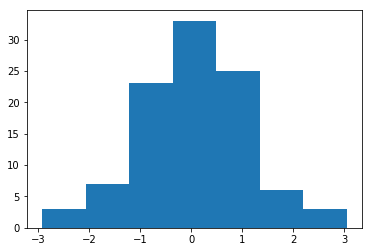

In [4]:
plt.hist(data,bins=7)
plt.show()

In [5]:
print('sample mean =', np.mean(data))
print('sample standard deviation =', np.std(data))

sample mean = 0.04354440085226062
sample standard deviation = 1.0696066681426202


## Some properties of popular distributions

### a) Gaussian

$$
x\sim {\cal N}(\mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\} 
$$

In [7]:
f = lambda x:stats.norm.pdf(x,0,1)

**TODO**: verify normalisation 

In [18]:
mean, error = integrate.quad(f, -np.inf, np.inf)
mean

0.9999999999999998

**TODO**: get the expectation value          

In [17]:
integrand = lambda x: x * f(x)
integrate.quad(integrand, -np.inf, np.inf)

(0.0, 0.0)

**TODO**: get the variance

In [20]:
integrand = lambda x: (x - mean)**2 * f(x)
integrate.quad(integrand, -np.inf, np.inf)

(2.0000000000000004, 1.6114791682735388e-08)

### b) Bernoulli
$$
k\sim {\rm Bern}(p) = p^k (1-p)^{1-k}
$$

In [21]:
P = lambda k: stats.bernoulli.pmf(k,0.3)

In [22]:
P(0) + P(1)

1.0

### c) generalised Bernoulli
$$
m\mapsto {\bf t} \sim {\rm gBern}({\bf p}) = \prod_{k=1}^K p_k^{t_k} 
$$
where the common procedure is to map the multiclass variable $m$ in a vector variable ${\bf t}$
according to the "1-to-K" coding scheme

In [23]:
K=3  # number of classes
p_1 = 0.2
p_2 = 0.5
p_3 = 1 - p_1 - p_2
p = np.array([p_1,p_2,p_3])
gBern = lambda t,p: np.prod(p**t)    

In [24]:
# 1-to-K coding scheme
gBern([0,0,1],p)

0.30000000000000004

In [93]:
# expected value, E[t|p]
terms=[]
for i in range(len(p)):
    t1=max(0,1-i)
    t2=min(i,2-i)
    t3=1-t1-t2
    t=np.array([t1,t2,t3])
    terms.append(gBern(t,p)*t[i])
print(terms)

[0.20000000000000001, 0.5, 0.30000000000000004]


## Random numbers following a given distribution

$10x3$ matrix of random numbers. Uniform distribution $[0,1)$:

In [26]:
np.random.rand(10, 3)

array([[0.27337013, 0.17182785, 0.71160339],
       [0.05906591, 0.39682527, 0.29783571],
       [0.88045287, 0.02827872, 0.01983189],
       [0.52214902, 0.70918563, 0.55995443],
       [0.30100306, 0.22217813, 0.61621488],
       [0.28897802, 0.69139894, 0.47545487],
       [0.66045308, 0.14738632, 0.02016952],
       [0.64459327, 0.51387668, 0.71398149],
       [0.32569668, 0.43749843, 0.01025456],
       [0.55653814, 0.50789279, 0.6568868 ]])

$100$ random numbers following a normal distrib. $N(mu=0,sigma=1)$:

In [41]:
Nnumbers = stats.norm.rvs(0, 1, size=100)
Nnumbers

array([ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ,
        0.73736858,  1.49073203, -0.93583387,  1.17582904, -1.25388067,
       -0.6377515 ,  0.9071052 , -1.4286807 , -0.14006872, -0.8617549 ,
       -0.25561937, -2.79858911, -1.7715331 , -0.69987723,  0.92746243,
       -0.17363568,  0.00284592,  0.68822271, -0.87953634,  0.28362732,
       -0.80536652, -1.72766949, -0.39089979,  0.57380586,  0.33858905,
       -0.01183049,  2.39236527,  0.41291216,  0.97873601,  2.23814334,
       -1.29408532, -1.03878821,  1.74371223, -0.79806274,  0.02968323,
        1.06931597,  0.89070639,  1.75488618,  1.49564414,  1.06939267,
       -0.77270871,  0.79486267,  0.31427199, -1.32626546,  1.41729905,
        0.80723653,  0.04549008, -0.23309206, -1.19830114,  0.19952407,
        0.46843912, -0.83115498,  1.16220405, -1.09720305, -2.12

Sub-random numbers:

In [34]:
np.random.seed(123)
stats.norm.rvs(10, 1, size=5)

array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975])

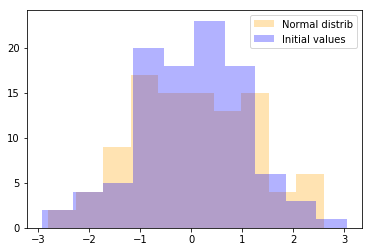

In [47]:
plt.hist(Nnumbers, bins=10, color='orange', label='Normal distrib', alpha=0.3)
plt.hist(data, bins=10, color='blue', alpha=0.3, label='Initial values')
plt.legend()
plt.show()